In [25]:
from PIL import Image as img
import numpy as np
import cv2
import matplotlib.pyplot as plt
lena=img.open('/Users/wangyiyao/NTU-CV/lena.bmp')
lena_arr = np.asarray(lena)

In [26]:
HW2_a=(lena_arr//128)*255
img.fromarray(HW2_a).save("HW2_a.bmp")

In [27]:
m=[0]*256
for i in range(512):
    for j in range(512):
        m[lena_arr[i][j]]+=1

In [43]:
lena_arr

array([[162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       ...,
       [ 43,  43,  50, ..., 104, 100,  98],
       [ 44,  44,  55, ..., 104, 105, 108],
       [ 44,  44,  55, ..., 104, 105, 108]], dtype=uint8)

(array([4.45625999e-06, 3.11938199e-05, 8.46689398e-05, 1.29231540e-04,
        2.62919339e-04, 4.32257219e-04, 0.00000000e+00, 6.10507618e-04,
        8.11039318e-04, 9.84833457e-04, 1.33242174e-03, 1.88054171e-03,
        2.22367373e-03, 0.00000000e+00, 2.73614363e-03, 3.37784507e-03,
        4.20670943e-03, 4.72363559e-03, 5.59260628e-03, 6.42147064e-03,
        0.00000000e+00, 7.34391646e-03, 7.84301758e-03, 8.39559382e-03,
        8.90360746e-03, 9.31358337e-03, 9.01501395e-03, 0.00000000e+00,
        9.36260223e-03, 9.30467085e-03, 9.04620777e-03, 8.81448226e-03,
        8.05691806e-03, 7.70932978e-03, 0.00000000e+00, 7.43304166e-03,
        7.02752200e-03, 6.54624592e-03, 5.69510026e-03, 5.50793734e-03,
        5.43663718e-03, 0.00000000e+00, 4.46962877e-03, 4.14432179e-03,
        4.34485349e-03, 3.92150879e-03, 3.97944017e-03, 3.51598913e-03,
        0.00000000e+00, 3.55609547e-03, 3.42686393e-03, 3.48479531e-03,
        3.78782099e-03, 3.65858945e-03, 3.70315205e-03, 0.000000

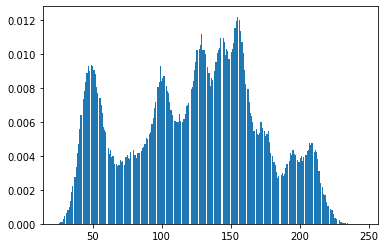

In [28]:
plt.hist(lena_arr.flatten(),257,density=True)


In [29]:
lena_arr.flatten()

array([162, 162, 162, ..., 104, 105, 108], dtype=uint8)

In [30]:
lena_arr

array([[162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       ...,
       [ 43,  43,  50, ..., 104, 100,  98],
       [ 44,  44,  55, ..., 104, 105, 108],
       [ 44,  44,  55, ..., 104, 105, 108]], dtype=uint8)

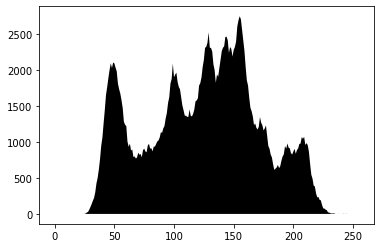

In [31]:
plt.fill(m,'black')
plt.savefig('HW2_b.jpg')

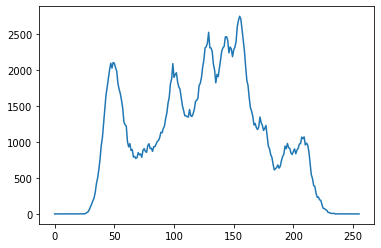

In [32]:
plt.plot(m)
plt.savefig('HW2_b.jpg')

In [33]:
from PIL import Image as img
import numpy as np
import cv2
import matplotlib.pyplot as plt
lena=img.open('/Users/wangyiyao/NTU-CV/lena.bmp')
lena_arr = np.asarray(lena)


region={}
grid=[[i//128 for i in j] for j in lena_arr]
idx=2
for i in range(512):
    for j in range(512):
        if grid[i][j]==1:
            u=i
            b=i
            l=j
            r=j
            area=1
            stack=[(i,j)]
            rows=i
            cols=j
            while stack:
                i1,j1=stack.pop()
                grid[i1][j1]=idx
                u=min(u,i1)
                b=max(b,i1)
                l=min(l,j1)
                r=max(r,j1)
                area+=1
                rows+=i1
                cols+=j1
                for x,y in [(i1,j1+1),(i1+1,j1),(i1-1,j1),(i1,j1-1)]:
                    if 0<=x<512 and 0<=y<512 and grid[x][y]==1:
                        stack.append((x,y))
                
            region[idx]=(rows//area,cols//area,u,b,l,r,area)
            idx+=1
result_region=[]
for i,j in region.items():
    if j[6]>500:
        result_region.append(j)
        

In [34]:
result_region

[(228, 42, 0, 511, 0, 87, 35849),
 (246, 346, 0, 511, 127, 511, 205524),
 (175, 132, 94, 237, 118, 157, 3798),
 (264, 116, 237, 287, 89, 139, 1134),
 (457, 17, 399, 511, 0, 31, 2827)]

In [35]:
HW2_c=np.array([[[i]*3 for i in j] for j in HW2_a],dtype='uint8')

In [36]:
for i in result_region:
    cv2.rectangle(HW2_c,(i[4],i[2]),(i[5],i[3]),(0,255,0),2)
    cv2.circle(HW2_c,(i[1],i[0]),5,(255,0,0),2)

In [37]:
img.fromarray(HW2_c).save("HW2_c.bmp")

In [38]:
HW2_a=(lena_arr//128)*255

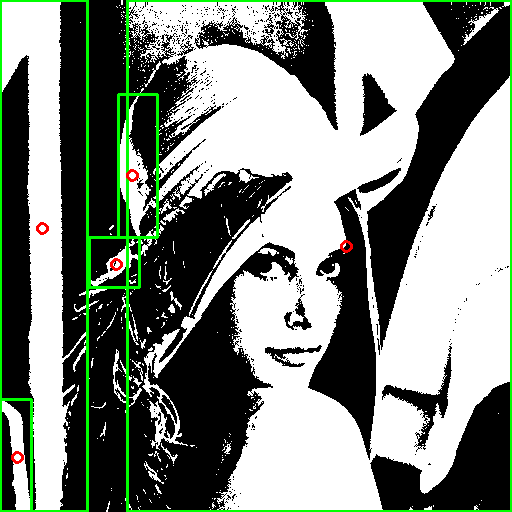

In [39]:
img.fromarray(HW2_c)